In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### 1. Read the dataset to the python environment.


In [4]:
df= pd.read_excel(r"C:\Users\ashwa\Downloads\iris (2).xls")
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 2. Do necessary Pre-processing Steps:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

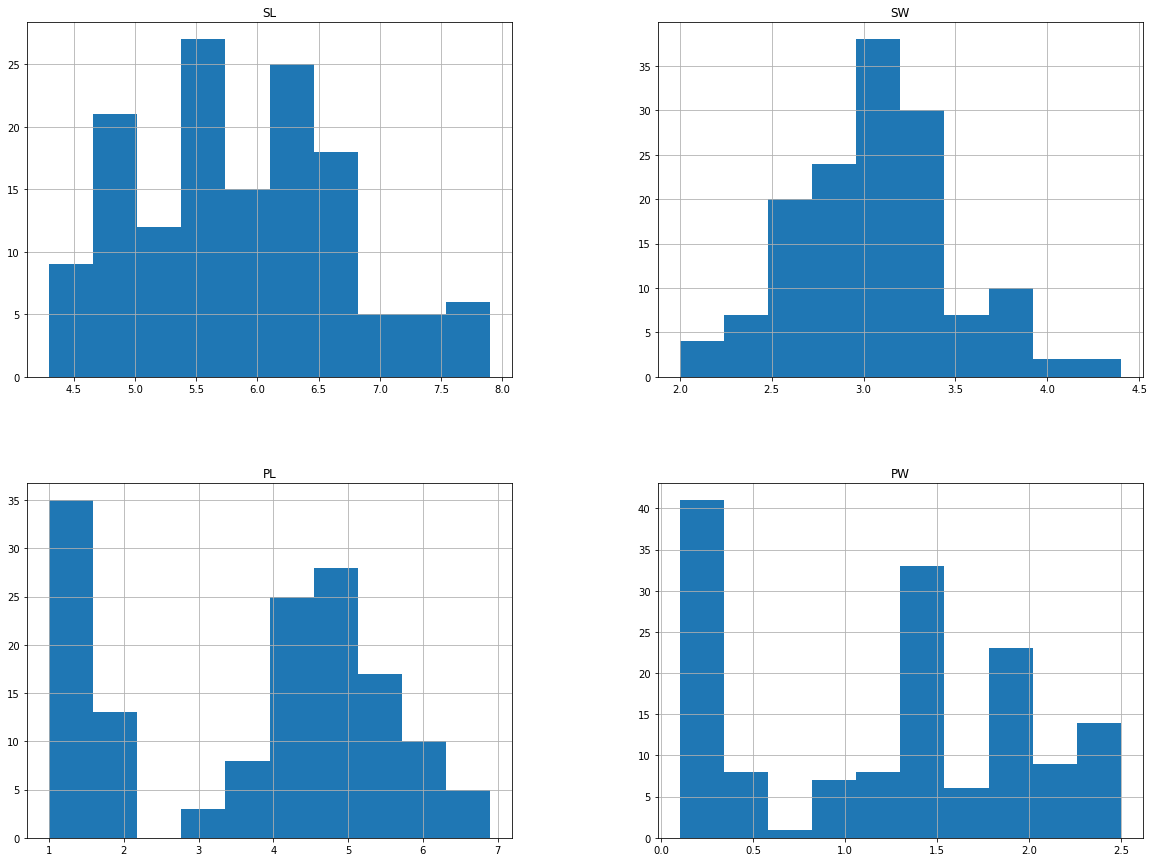

In [10]:
freqgraph=df.select_dtypes(include="float")
freqgraph.hist(figsize=(20,15))
plt.show()

Handling Missing Values

In [12]:
df['SL'] = df['SL'].fillna(df['PL'].mean())
df['SW'] = df['SW'].fillna(df['PL'].mean())
df['PL'] = df['PL'].fillna(df['PL'].mean())

In [14]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Handling Outliers

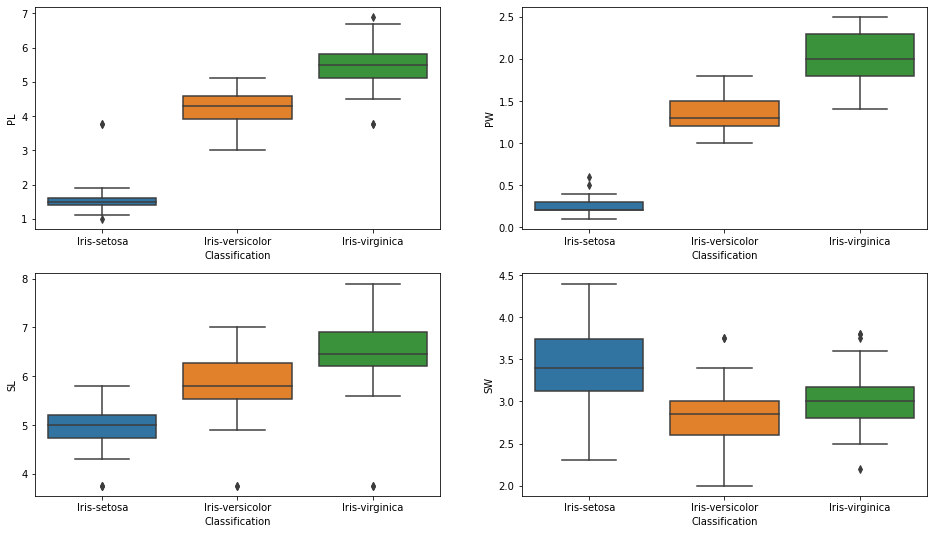

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=df['PL'], x= 'Classification', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y=df['PW'], x= 'Classification', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y=df['SL'], x= 'Classification', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y=df['SW'], x= 'Classification', data=df, orient='v' , ax=axes[1, 1])
plt.show()

In [16]:
for column in df.columns[0:4]:
    for classification in df["Classification"].unique():
        class_type = df[df["Classification"] == classification]
        Selected_column = class_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        df.drop(index = outlierss, inplace=True) # dropping outliers

Int64Index([2, 21, 39], dtype='int64')
Int64Index([51, 85], dtype='int64')
Int64Index([106, 141], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([72, 98], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([22, 28, 42], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([109, 147], dtype='int64')
Int64Index([23, 43], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


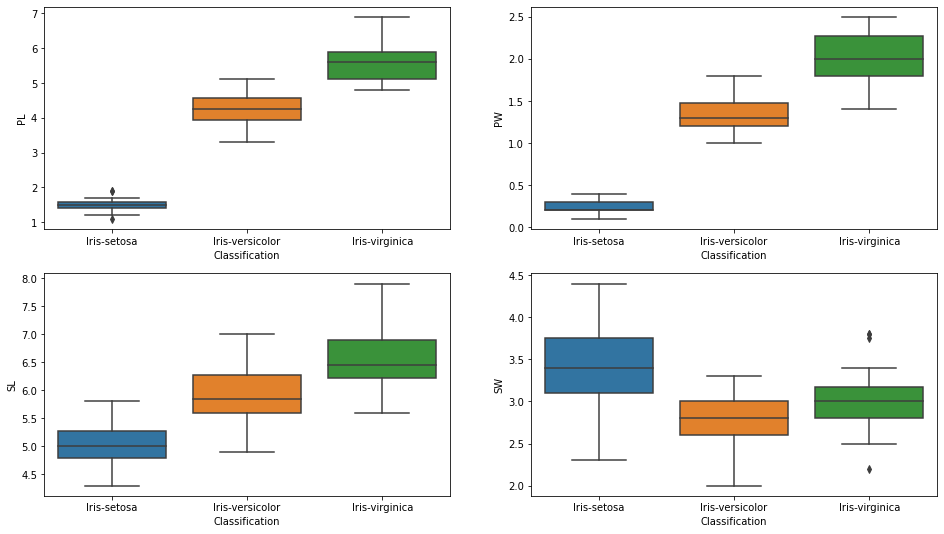

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=df['PL'], x= 'Classification', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y=df['PW'], x= 'Classification', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y=df['SL'], x= 'Classification', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y=df['SW'], x= 'Classification', data=df, orient='v' , ax=axes[1, 1])
plt.show()

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm).

Logistic Regression Algorithm

In [20]:
y = df['Classification']
x = df.drop('Classification',axis=1)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

C:\Users\ashwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.975609756097561
Precision is:  0.975609756097561
Recall is:  0.975609756097561
F1 score is:  0.975609756097561


In [24]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 12]], dtype=int64)

KNN Algorithm


In [25]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred =  classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [26]:
acc_values

[0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561]

In [27]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test) 

In [28]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.975609756097561
Precision is:  0.975609756097561
Recall is:  0.975609756097561
F1 score is:  0.975609756097561


Decision Tree Algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [30]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))


Accuracy is:  0.975609756097561
Precision is:  0.975609756097561
Recall is:  0.975609756097561
F1 score is:  0.975609756097561


In [31]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 12]], dtype=int64)

Support Vector Machine

In [32]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)

In [33]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.975609756097561
Precision is:  0.975609756097561
Recall is:  0.975609756097561
F1 score is:  0.975609756097561


Random Forest Classifier Algorithm

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [36]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  0.975609756097561
Precision is:  0.975609756097561
Recall is:  0.975609756097561
F1 score is:  0.975609756097561
